In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('train.csv')

In [3]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df1.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [38]:
from nltk.corpus import stopwords
import nltk, os, re, string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df1['text']=df1['text'].apply(remove_stopwords)
#test['text']=test['text'].apply(remove_stopwords)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\SPB_Data/nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\share\\nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\VIKRAM PATEL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [39]:
import nltk

In [40]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
from nltk.corpus import brown
brown.words()

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\SPB_Data/nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\share\\nltk_data'
    - 'E:\\Anaconda\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\VIKRAM PATEL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
def process_text(text):
    text = re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])", " ",text.lower())
    words = nltk.word_tokenize(text)
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
    text = " ".join(words)
        
    return text

df1["text"] = df1["text"].apply(process_text)
#test["text"] = test["text"].apply(process_text)

In [ ]:
import emoji

def cleanTweet(txt):
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'\n','',txt)
    # to remove emojis
    txt = re.sub(emoji.get_emoji_regexp(), r"", txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    txt = re.sub(r"https?://\S+|www\.\S+","",txt)
    txt = re.sub(r"<.*?>","",txt)
    return txt  

In [ ]:
df1["text"] = df1["text"].apply(cleanTweet)
#test["text"] = test["text"].apply(cleanTweet)

In [5]:
train_disaster = df1[df1["target"] == 1]
train_not_disaster  = df1[df1["target"] == 0]


In [12]:
train_disaster

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [13]:
train_not_disaster

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [22]:
df1["length"] = df1["text"].apply(len)

AttributeError: module 'seaborn' has no attribute 'histplot'

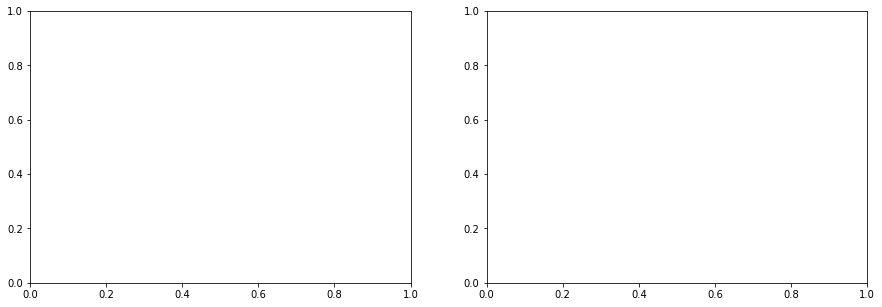

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df1[df1["target"] == 1]["length"],ax = ax1).set(title = "disaster tweets")
sns.countplot(df1[df1["target"] == 0]["length"],ax = ax2).set(title = "Not disaster tweets")
plt.show()

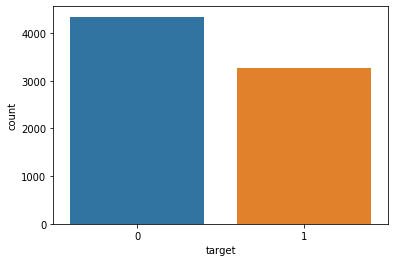

In [14]:
sns.countplot(df1['target'])